In [2]:
from acoular import LoudnessStationary, LoudnessTimevariant, TimeSamples, TimeInOut
from mosqito import loudness_zwtv

c:\Users\HP\anaconda3\envs\acoular\Lib\site-packages\numpy\__config__.py:155: UserWarning: Install `pyyaml` for better output
  warnings.warn("Install `pyyaml` for better output", stacklevel=1)
c:\Users\HP\acoular\acoular\h5files.py:5: UserWarning: We detected that Numpy is already loaded and uses OpenBLAS. Because this conflicts with Numba parallel execution, we disable parallel execution for now and processing might be slower. To speed up, either import Numpy after Acoular or set environment variable OPENBLAS_NUM_THREADS=1 before start of the program.
  from .configuration import config


# Example Data

In [2]:
# from os import path

# from acoular import MicGeom, Mixer, PointSource, WNoiseGenerator, WriteH5
# from acoular import __file__ as bpath

# sfreq = 48000
# duration = 1
# nsamples = duration * sfreq
# micgeofile = path.join(path.split(bpath)[0], 'xml', 'array_64.xml')
# h5savefile = 'three_sources_48kHz.h5'

# m = MicGeom(from_file=micgeofile)
# n1 = WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=1)
# n2 = WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=2, rms=0.7)
# n3 = WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=3, rms=0.5)
# p1 = PointSource(signal=n1, mics=m, loc=(-0.1, -0.1, 0.3))
# p2 = PointSource(signal=n2, mics=m, loc=(0.15, 0, 0.3))
# p3 = PointSource(signal=n3, mics=m, loc=(0, 0.1, 0.3))
# p = Mixer(source=p1, sources=[p2, p3])
# wh5 = WriteH5(source=p, name=h5savefile)
# wh5.save()

# Loudness Stationary


In [3]:
ts = TimeSamples(name=r"C:\Users\HP\acoular\examples\example_data.h5")
tio = TimeInOut(source=ts)
# ts.sample_freq
ts.sample_freq

51200.0

In [4]:
ld_st = LoudnessStationary(source=ts)


source changed called
Calculating stationary loudness... depending on the file size, this might take a while
signal resampled to 48 kHz
init called


In [8]:
ld_st.numchannels

56

In [6]:
ld_tv = LoudnessTimevariant(source=tio)

source changed called
Calculating timevariant loudness... depending on the file size, this might take a while
signal resampled to 48 kHz
init called


# Beamforming

In [9]:
import acoular
from os import path

In [10]:
micgeofile = path.join(path.split(acoular.__file__)[0], 'xml', 'array_56.xml')
datafile = r'examples/example_data.h5'
# micgeofile = path.join(path.split(acoular.__file__)[0], 'xml', 'array_64.xml')
# datafile = "three_sources_48kHz.h5"
calibfile = 'example_calib.xml'

In [11]:
mg = acoular.MicGeom(from_file=micgeofile)
ts = acoular.MaskedTimeSamples(name=datafile)

rg = acoular.RectGrid(x_min=-0.6, x_max=0.0, y_min=-0.3, y_max=0.3, z=0.68, increment=0.05)
env = acoular.Environment(c=346.04)
st = acoular.SteeringVector(grid=rg, mics=mg, env=env)

In [12]:
bt = acoular.BeamformerTime(source=ts, steer=st)

In [13]:
ld_bt = LoudnessStationary(source=bt)

source changed called
Calculating stationary loudness... depending on the file size, this might take a while
signal resampled to 48 kHz
init called


In [14]:
oal = ld_bt.overall_loudness
oal = oal.reshape(rg.shape)

# Plot

In [26]:
from pylab import colorbar, figure, imshow, show, subplot, tight_layout, title
import numpy as np

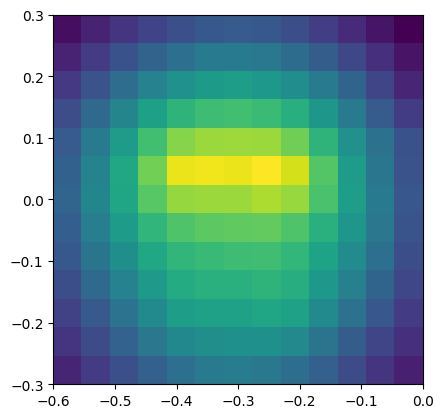

In [27]:
imshow(oal, vmax=np.max(oal), origin='lower', interpolation='nearest', extent=rg.extend())
show()

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>

***

> Text that will be indented when the Markdown is rendered.

- Main bullet point
     - Sub bullet point

`string`


# for titles
## for major headings
### for subheadings
#### for 4th level subheadings


Bold text: __string__ or **string**
Italic text: _string_ or *string*
